# Práctica 4. Operaciones sobre imágenes rgb

<div class="alert alert-block alert-success">
<b>Resumen:</b> En esta práctica se realizan varias operaciones sobre una imagen RGB utilizando OpenCV y NumPy. Se inicia cargando y visualizando la imagen original. Luego, se obtiene una copia para manipularla sin afectar la inicial. Las manipulaciones incluyen el trazo de líneas horizontales y verticales en coordenadas especificas, así como la alteración de una región particular de la imagen mediante un operador de rango. A continuación, se extrae y visualiza individualmente los canales de color rojo, verde y azul. Finalmente, el notebook realiza segmentaciones de la imagen utilizando umbrales unilaterales y bilaterales, permitiendo aislar regiones específicas del canal rojo de la imagen en escala de grises. Estas operaciones son fundamentales para el análisis y manipulación de imágenes en aplicaciones de procesamiento digital.
</div>

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Imágenes RGB o color

Lectura de la imagen

In [22]:
im_bgr = cv2.imread('./images/peppers.png')
im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

Atributos de la imagen

In [23]:
print("Atributos de la imagen:", im_rgb.shape, im_rgb.dtype)

Atributos de la imagen: (384, 512, 3) uint8


Visualización de la imagen

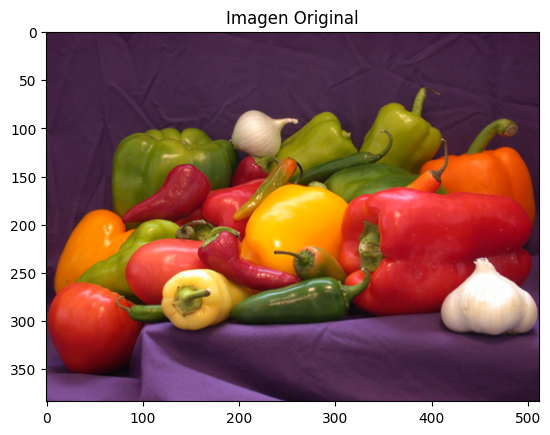

In [24]:
plt.figure()
plt.imshow(im_rgb)
plt.title('Imagen Original')
plt.show()

## 2. Operaciones
### 2.1 Copia de la imagen

In [25]:
im_rgb_2 = im_rgb.copy()

### 2.2. Operador :

#### 2.2.1 Dibujo de una linea horizontal
Dado que la imagen es indexada los índices varían entre [0, 255]

In [26]:
im_rgb_2[50, :, 0] = 0   # R
im_rgb_2[50, :, 1] = 0   # G
im_rgb_2[50, :, 2] = 255 # B

Visualización de la imagen

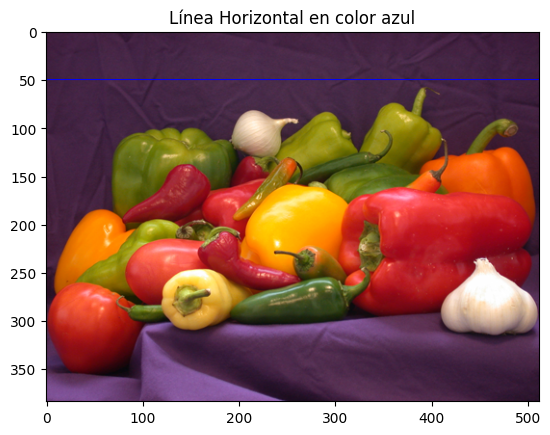

In [27]:
plt.figure()
plt.imshow(im_rgb_2)
plt.title('Línea Horizontal en color azul')
plt.show()

#### 2.2.2. Dibujo de una linea vertical

In [28]:
im_rgb_2[:, 100, 0] = 0   # R
im_rgb_2[:, 100, 1] = 0   # G
im_rgb_2[:, 100, 2] = 255 # B

Visualización de la imagen

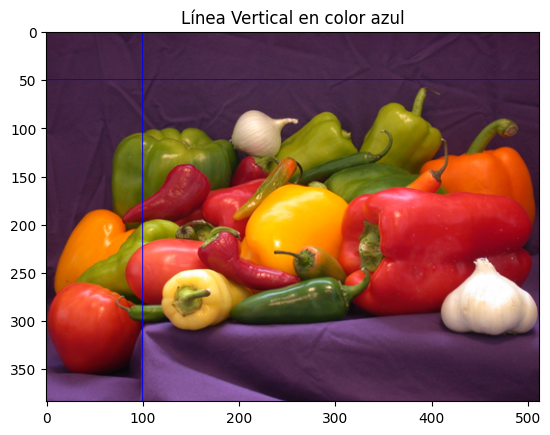

In [29]:
plt.figure()
plt.imshow(im_rgb_2)
plt.title('Línea Vertical en color azul')
plt.show()

### 2.3. Operador a:b

In [30]:
im_rgb_2[80:120, 10:150, 0] = 158 # R
im_rgb_2[80:120, 10:150, 1] = 26  # G
im_rgb_2[80:120, 10:150, 2] = 196 # B

Visualización de la imagen

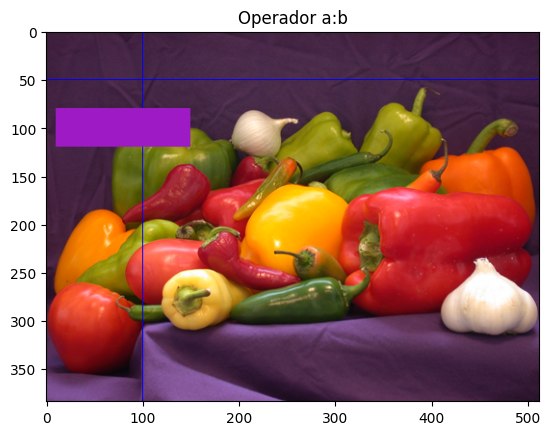

In [31]:
plt.figure()
plt.imshow(im_rgb_2)
plt.title('Operador a:b')
plt.show()

### 2.4 Extracción de los canales de color

Extracción de los canales de color r, g, b de la imagen

In [32]:
im_r = im_rgb[:, :, 0]
im_g = im_rgb[:, :, 1]
im_b = im_rgb[:, :, 2]

Características de la nueva imagen

In [33]:
print("Características del canal R:", im_r.shape, im_r.dtype)

Características del canal R: (384, 512) uint8


### 2.3 Visualización por canal

Canal rojo

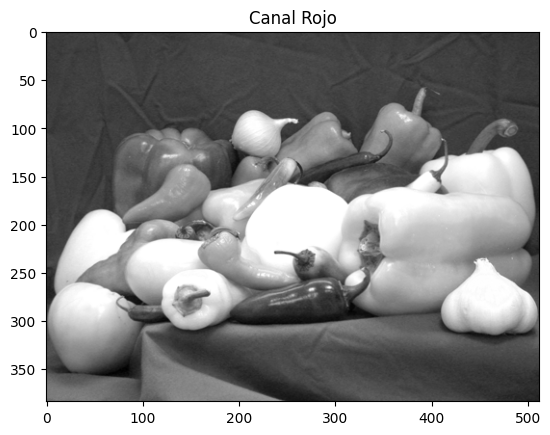

In [34]:
plt.figure()
plt.imshow(im_r, cmap='gray')
plt.title('Canal Rojo')
plt.show()

Canal verde

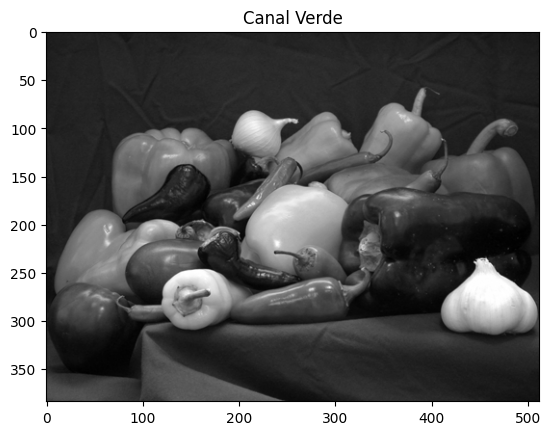

In [35]:
plt.figure()
plt.imshow(im_g, cmap='gray')
plt.title('Canal Verde')
plt.show()

Canal azul

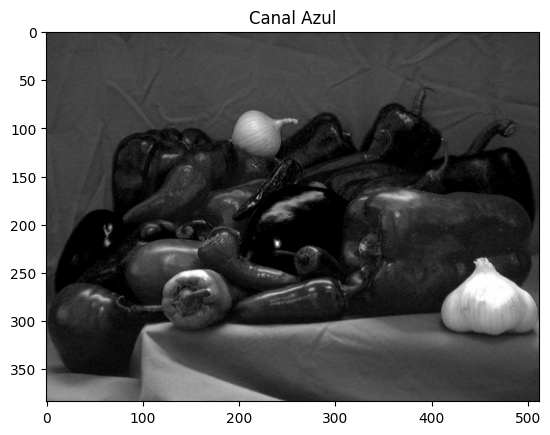

In [36]:
plt.figure()
plt.imshow(im_b, cmap='gray')
plt.title('Canal Azul')
plt.show()

### 2.4. Segmentación por umbrales de imágenes RGB

#### 2.4.1 Uni-lateral

In [37]:
umbral_uni = 160
im_bw_s1 = im_r > umbral_uni  # imagen binaria

Visualización de la imagen

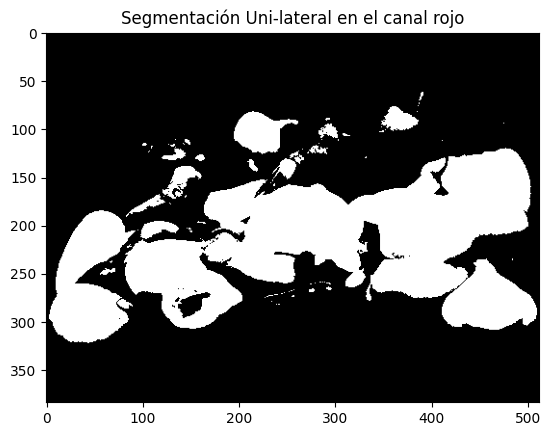

In [38]:
plt.figure()
plt.imshow(im_bw_s1, cmap='gray')
plt.title('Segmentación Uni-lateral en el canal rojo')
plt.show()

#### 2.4.2 Bi-lateral

In [39]:
umbral_sup = 200
umbral_inf = 160
im_bw_s2 = (im_r > umbral_inf) & (im_r < umbral_sup)

Visualización de la imagen

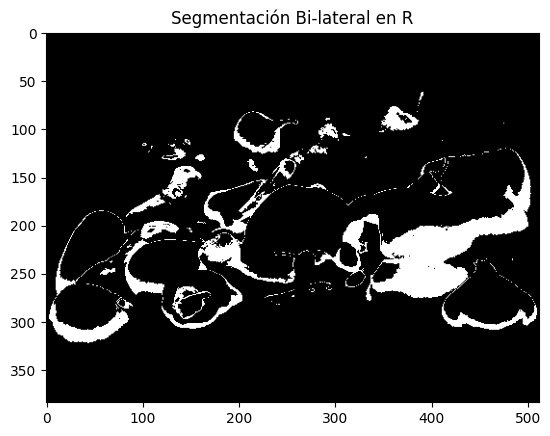

In [40]:
plt.figure()
plt.imshow(im_bw_s2, cmap='gray')
plt.title('Segmentación Bi-lateral en R')
plt.show()

### Recomendación

<div class="alert alert-block alert-info">
 
En la práctica, y según el dominio de aplicación, usualmente alguno de los canales nos proporcionará más información que otro. Por lo tanto, es posible segmentar el canal R, G, y B en forma independiente y luego combinar sus segmentaciones con algún operador binario,
por ejemplo: AND, OR, NAND, etc. Más si nembargo, en el sentido extricto, esta operación no es muy útil para realizar una segmentación por color. En su lugar, es recomendable convertir la imagen a otro espacio de color y en este realizar la segmentació
</div>.

<div style="text-align: center; margin: 20px 0;">
  <hr style="border: none; height: 2px; background: linear-gradient(to right, #bbb, #333, #bbb); width: 50%; margin: 0 auto;" />
</div>